### Analyse Data of 'Air Quality' UCI

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startvis import *
from Starts.startmod import *
%matplotlib inline

local_kwargs {'data_path': './data/AirQualityUCI.xlsx, ./data/AirQualityUCI.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
nonan_data = data[1]
StartMod.convert_time_series(nonan_data, time_column='Date_Time').head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
nonan_data.columns, nonan_data.index

(Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
        'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
        'T', 'RH', 'AH'],
       dtype='object'),
 DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
                '2004-03-10 20:00:00', '2004-03-10 21:00:00',
                '2004-03-10 22:00:00', '2004-03-10 23:00:00',
                '2004-03-11 00:00:00', '2004-03-11 01:00:00',
                '2004-03-11 02:00:00', '2004-03-11 03:00:00',
                ...
                '2005-04-04 05:00:00', '2005-04-04 06:00:00',
                '2005-04-04 07:00:00', '2005-04-04 08:00:00',
                '2005-04-04 09:00:00', '2005-04-04 10:00:00',
                '2005-04-04 11:00:00', '2005-04-04 12:00:00',
                '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
               dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None))

In [15]:
StartML.nan_summary(nonan_data)

Nans_columns: 
[]
Nans_rows: 
0


In [5]:
nonan_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
nonan_data['2005':].index.shape, nonan_data['2005':].values.shape, len(nonan_data.columns)

((2247,), (2247, 13), 13)

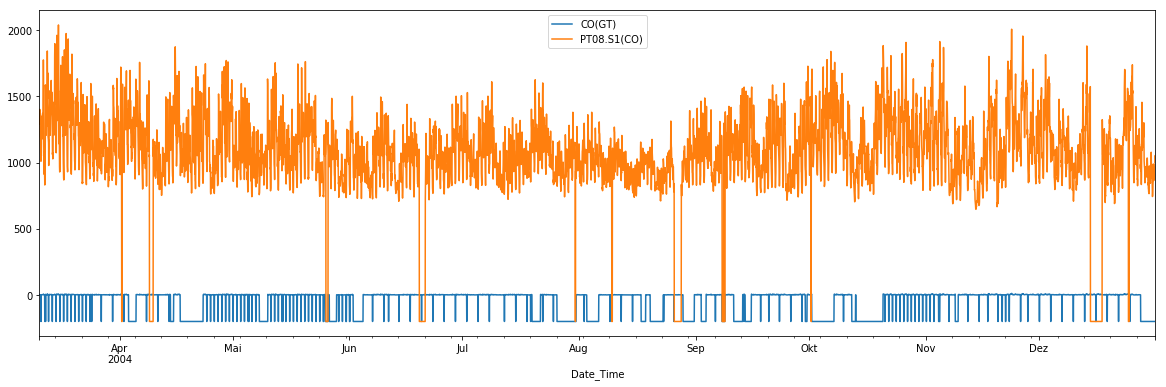

In [7]:
# visual column features CO(GT) and PT08.S1(CO) in year 2004
nonan_data['2004'][['CO(GT)', 'PT08.S1(CO)']].plot(figsize=(20,6))
plt.legend()

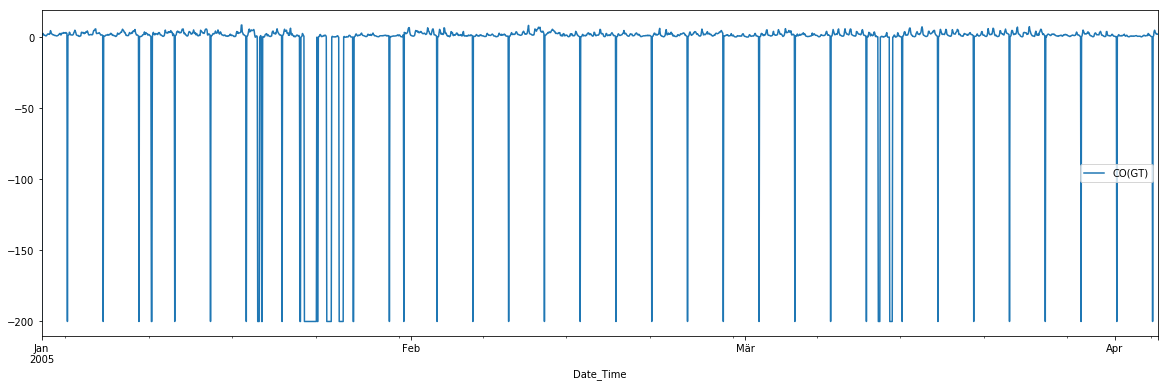

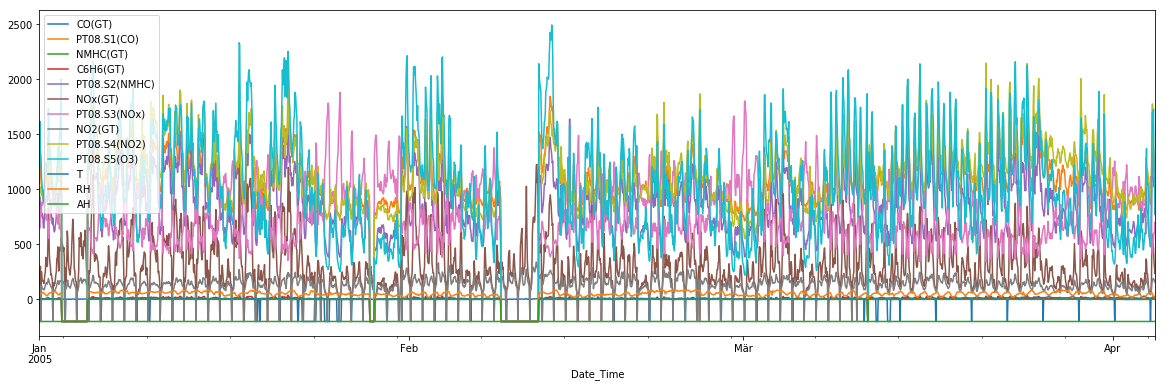

In [8]:
# visual column feature CO(GT) in year 2005
nonan_data['2005':]['CO(GT)'].plot(figsize=(20,6))
plt.legend()

# visual all column features in year 2005
nonan_data['2005':].plot(figsize=(20,6))
plt.legend()

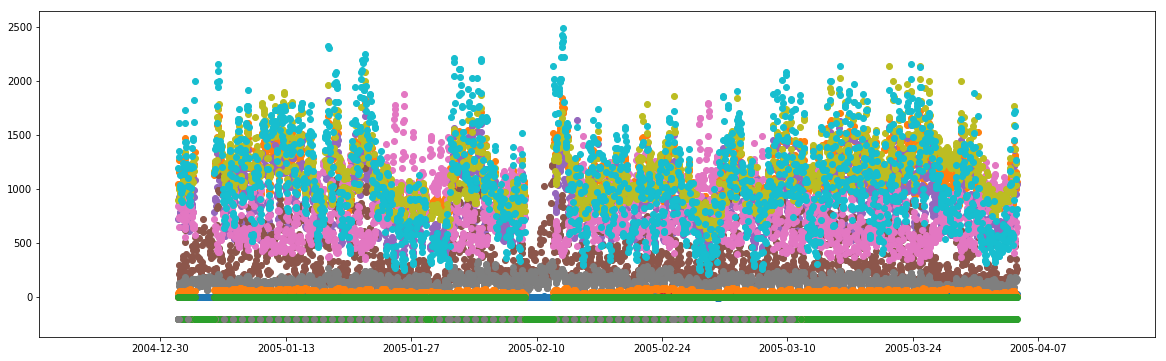

In [9]:
# visual scatter for all feature columns in year 2005
plt.figure(figsize=(20, 6))
for col in nonan_data.columns:
    plt.scatter(nonan_data['2005':][col].index, nonan_data['2005':][col].values)
    

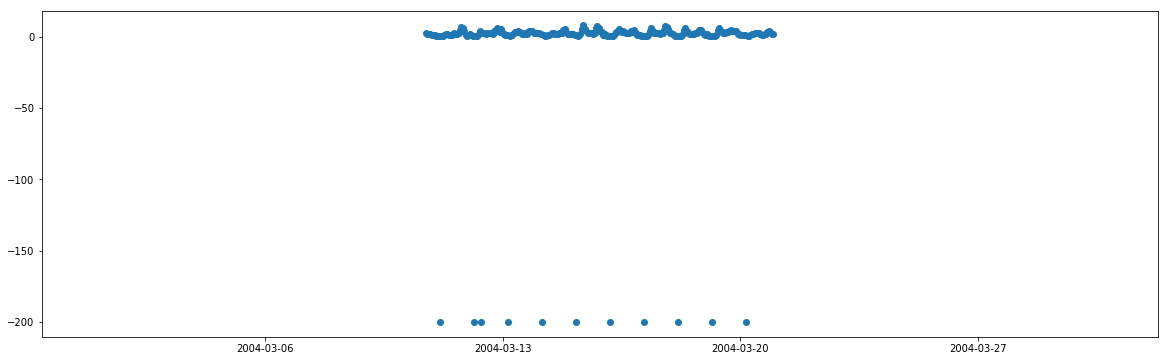

In [10]:
# visual scatter for feature column CO(GT) in specific day 2005-04-04
plt.figure(figsize=(20, 6))
plt.scatter(nonan_data['2004-03-10':'2004-03-20']['CO(GT)'].index, 
            nonan_data['2004-03-10':'2004-03-20']['CO(GT)'].values)

In [11]:
len(nonan_data.columns)

13

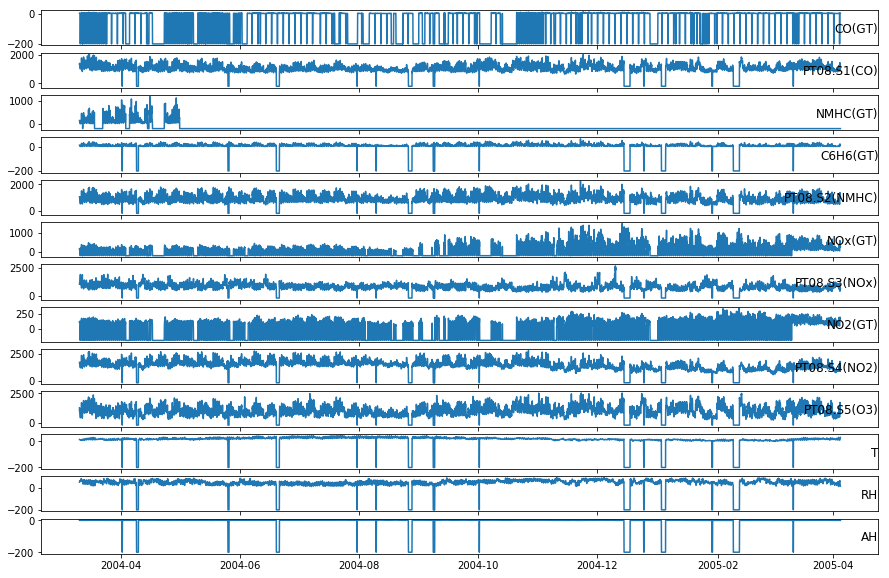

In [16]:
# Visual all features column of data
StartVis.vis_subplot(nonan_data)